# Flat sky power spectrum analysis without masking

In [1]:
%config InlineBackend.figure_format = 'retina'
from pixell import enmap,curvedsky,utils,powspec,enplot
import numpy as np
import matplotlib.pyplot as plt
import math

# Setting up a map

In [2]:
# opens file in ad sims qu_L05x
def get_path_x(filename):
    from astropy.io import fits
    path = '/home/users/elizamg/AD_Sims/qu_LOSx/' + filename
    return path

In [3]:
# opens file in ad sims qu_L05y
def get_path_y(filename):
    from astropy.io import fits
    path = '/home/users/elizamg/AD_Sims/qu_LOSy/' + filename
    return path

In [4]:
#print('enter filename I:')

#Imap_512_alfven1_0001_a_x.fits

#filename = input()

filename = 'Imap_512_alfven6_0004_e_x.fits'
length = len(filename)
char = filename[length - 6]
if char == "x":
    path = get_path_x(filename)
else:
    path = get_path_y(filename)

map_I = enmap.read_map(path)

#imap = enmap.read_map(path,)

In [5]:
#print('enter filename q:')

filename = 'q_512_alfven6_0004_e_x.fits'

#filename = input()
length = len(filename)
char = filename[length - 6]
if char == "x":
    path = get_path_x(filename)
else:
    path = get_path_y(filename)
    
map_Q = enmap.read_map(path)

In [6]:
#print('enter filename u:')

filename = 'u_512_alfven6_0004_e_x.fits'

#filename = input()
length = len(filename)
char = filename[length - 6]
if char == "x":
    path = get_path_x(filename)
else:
    path = get_path_y(filename)
map_U = enmap.read_map(path)

In [7]:
count = 0
for row in map_I:
    for cell in row:
        if math.isnan(cell):
            count = count + 1
            
count = 0
for row in map_Q:
    for cell in row:
        if math.isnan(cell):
            count = count + 1
count = 0
for row in map_U:
    for cell in row:
        if math.isnan(cell):
            count = count + 1
# if there is a NaN value in the first row, set it to 0
if count == 1:
    map_I[0][0] = 0
if count == 1:
    map_Q[0][0] = 0
if count == 1:
    map_U[0][0] = 0

In [8]:
#parsing filename
length = len(filename)
axis = filename[length - 6] + ' Axis '
mat = filename[length - 8]
if mat == 'a':
    matter = 'Ionic'
else:
    matter = 'Nuetral'
number = filename[6:13] + ' ' + filename[14:18]
print(number)
title1= matter + ' Intensity Integrated Along the ' + axis + '(' + number +')'
title2 = '2D TE Power Spectrum of ' + matter + ' Matter ' +'(' + number +')'
title3 = 'TE Power Spectrum of ' + matter + ' Matter ' + '(' + number +')'

alfven6 0004


In [9]:
print('map i:', map_I)
print('map q:', map_Q)
print('map u:', map_U)

# combining files into one map
# construct an empty (filled with zeros) array of shape 512 x 512 x 3 
# corresponds to 
shape2,wcs2 = enmap.geometry(shape=(512,512),res=np.deg2rad(5/60.),pos=(0,0))
map_IQU = enmap.zeros((3, 512, 512), wcs = wcs2, dtype=map_I.dtype)

# Place your I, Q, and U maps into the array. (Assuming you've separately read in the fits files and named them Imap, Qmap, Umap)
map_IQU[0, :, :] = map_I
map_IQU[1, :, :] = map_Q
map_IQU[2, :, :] = map_U

print(map_IQU)

map i: ndmap([[0.        1.0817003 1.0804236 ... 1.0862336 1.085319  1.0840702]
 [1.1058755 1.1040672 1.101671  ... 1.1091362 1.1085652 1.1074823]
 [1.1277926 1.1248499 1.1209819 ... 1.1330168 1.1319374 1.1303208]
 ...
 [1.0385972 1.0345072 1.0309486 ... 1.0536319 1.048106  1.0431675]
 [1.0464348 1.0441014 1.0420687 ... 1.056786  1.052602  1.0492268]
 [1.0618557 1.0607023 1.0595788 ... 1.0678197 1.0654502 1.0634623]],:{cdelt:[1,1],crval:[0,0],crpix:[0.00,0.00]})
map q: ndmap([[ 0.       20.23774  20.28332  ... 19.818117 19.96244  20.076298]
 [19.968075 20.077267 20.150478 ... 19.465588 19.66203  19.831005]
 [19.70433  19.83831  19.933706 ... 19.106747 19.33671  19.537773]
 ...
 [20.971495 20.916248 20.843733 ... 20.959253 21.005928 21.009119]
 [20.604057 20.586697 20.559484 ... 20.55676  20.601006 20.615095]
 [20.351576 20.378933 20.39398  ... 20.175104 20.25698  20.315521]],:{cdelt:[1,1],crval:[0,0],crpix:[0.00,0.00]})
map u: ndmap([[ 0.         -0.23075017 -0.51124996 ...  0.8680209 

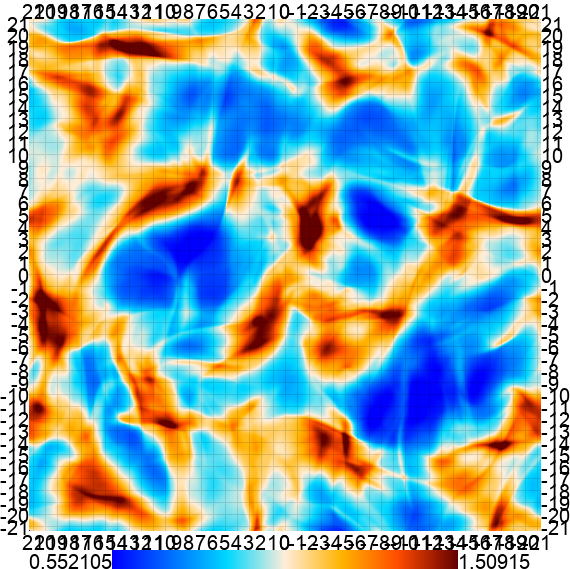

In [10]:
ps,_ = powspec.read_camb_scalar('/home/users/elizamg/flat-sky-power-spectra/test_scalCls.dat')
shape2,wcs2 = enmap.geometry(shape=(512,512),res=np.deg2rad(10/60.),pos=(0,0))
shape2 = (3,) + shape2
map_IQU2 = enmap.rand_map(shape2,wcs2,ps,spin=[0,2])
#print(map_IQU2.shape)
#plt.colorbar()
enplot.show(enplot.plot(map_IQU[0], ticks=1, colorbar=True))
#enplot.draw_colorbar(0,0,0)

In [11]:
print(map_IQU.wcs)
print(map_IQU.shape)
print(map_IQU2.wcs)
print(map_IQU2.shape)

car:{cdelt:[-0.08333,0.08333],crval:[0,0],crpix:[257.00,257.00]}
(3, 512, 512)
car:{cdelt:[-0.1667,0.1667],crval:[0,0],crpix:[257.00,257.00]}
(3, 512, 512)


# Going to Fourier space

In [12]:
k_map_TEB = enmap.map2harm(map_IQU, nthread=0, normalize="phys")

In [13]:
print(k_map_TEB.shape)  # T, E, B components in first index

(3, 512, 512)


# The 2D TE power spectrum

In [14]:
# unpack our stuff for clarity
k_map_T = k_map_TEB[0]
k_map_E = k_map_TEB[1]

# convenience function for convolution
TE_spec_2D = enmap.calc_ps2d(k_map_T, k_map_E)

Text(0.5, 1.0, '2D TE Power Spectrum of Nuetral Matter (alfven6 0004)')

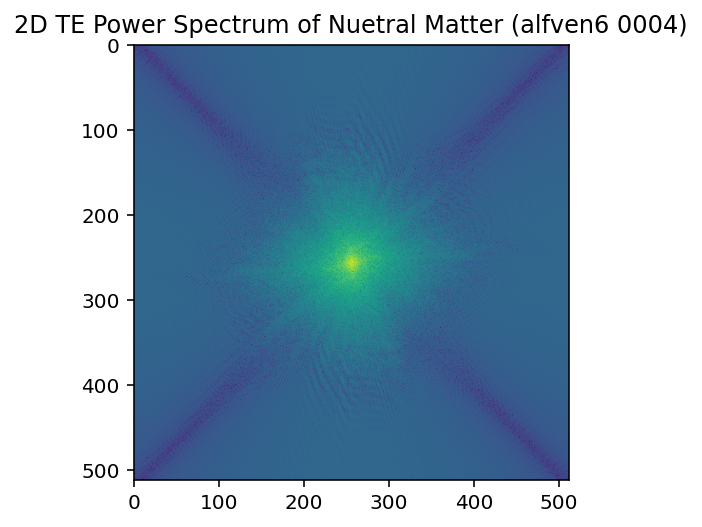

In [15]:
plt.imshow(np.log(np.abs(np.fft.fftshift(TE_spec_2D))))
plt.title(title2)

# Binning it up to make a 1D power spectrum

In [16]:
modlmap = TE_spec_2D.modlmap()  # get a map of |𝐤|

In [17]:
def bin(data,modlmap,bin_edges):
    digitized = np.digitize(np.ndarray.flatten(modlmap), bin_edges,right=True)
    return np.bincount(digitized,(data).reshape(-1))[1:-1]/np.bincount(digitized)[1:-1]

bin_edges = np.arange(0,1000,10)  # incriment by 40 bins for ℓ in (0,1000)
ell_bin_centers = (bin_edges[1:] + bin_edges[:-1])/2.
binned_power = bin(TE_spec_2D,modlmap,bin_edges)

In [18]:
print(count)
for item in binned_power:
    count = count + 1
print(count)

1
100


Text(0.5, 1.0, 'TE Power Spectrum of Nuetral Matter (alfven6 0004)')

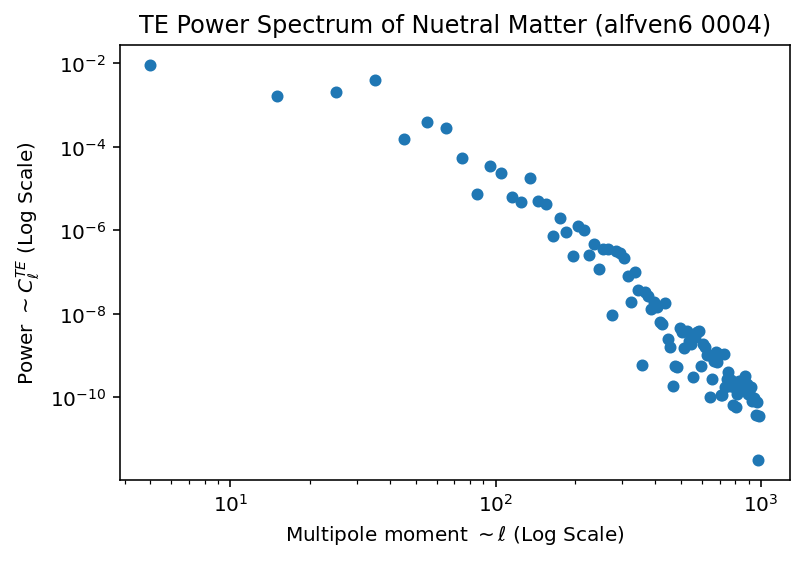

In [19]:
plt.plot(ell_bin_centers, np.abs(binned_power), "o", markersize=5)
#plt.plot(ell_bin_centers, np.abs(binned_power), markersize=5)
#plt.plot(np.arange(12,1000), ps[0,1,12:1000], "-", label="theory")
#plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Power $\sim C_{\ell}^{TE}$ (Log Scale)")
plt.xlabel("Multipole moment $\sim \ell$ (Log Scale)")
plt.title(title3)
# 4 degree by 4 degree patch of sky 